In [1]:
import pandas as pd
import os
import h5py
import seaborn as sns
import scanpy as sc
import anndata as ad

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/optuna/study/_optimize.py:29: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


In [2]:
data_dir = "/lustre/groups/ml01/workspace/ot_perturbation/models/otfm/pbmc_new_donor"

In [3]:
def get_cytokine_in_train(csv_file: str) -> int:
    file = csv_file.split(".")[0]
    file_path = os.path.join(data_dir, f"{file}_preds.h5ad")
    with h5py.File(file_path, "r") as f:
    
        if "uns" in f:
            uns = {}
            for key in f["uns"].keys():
                uns[key] = f["uns"][key][()]
        else:
            raise ValueError(f"Error for {csv_file}")

    return [uns['cytokine_in_train']]

In [4]:
df_res = pd.DataFrame(columns=["wandb_name", "cytokine", "donor", "ood_mmd", "ood_e_distance", "decoded_ood_r_squared", "num_cytokines", "cytokines_in_train"])

i=0
for el in os.listdir(data_dir):
    if el.endswith(".csv"):
        if len(el.split("_")) < 4:
            continue
        print(el)
        wandb_name = [el.split("_")[0]]
        cytokine = [el.split("_")[-2]]
        num_donors = [int(el.split("_")[-1].split(".")[0]) - 1] # -1 because it includes PBS
        donor = [el.split("_")[-3]]
        cytokines_in_train = get_cytokine_in_train(el)
        metrics = list(pd.read_csv(os.path.join(data_dir, el)).set_index("Unnamed: 0").loc[["ood_mmd", "ood_e_distance", "decoded_ood_r_squared"]].squeeze())
        df_res.loc[i] = wandb_name + cytokine + donor + metrics + num_donors + cytokines_in_train
        i+=1

charmed-yogurt-240_Donor9_FasL_9.csv
dandy-aardvark-207_Donor8_IFN-omega_33.csv
lively-firebrand-172_Donor7_IL-1Ra_2.csv
soft-dawn-266_Donor10_FasL_81.csv
confused-cherry-130_Donor5_OX40L_3.csv
faithful-cloud-282_Donor11_CD27L_5.csv
charmed-yogurt-240_Donor9_OX40L_9.csv
comfy-hill-76_Donor3_IL-32-beta_2.csv
sparkling-dawn-31_Donor1_OX40L_17.csv
dry-armadillo-120_Donor4_IFN-omega_9.csv
devoted-violet-264_Donor10_IL-1Ra_9.csv
dry-armadillo-120_Donor4_M-CSF_9.csv
dazzling-grass-177_Donor7_IL-1Ra_17.csv
graceful-sun-49_Donor1_BAFF_81.csv
peachy-jazz-78_Donor3_FasL_2.csv
dazzling-grass-177_Donor7_OX40L_17.csv
northern-serenity-178_Donor7_IL-32-beta_3.csv
divine-hill-294_Donor12_FasL_2.csv
devout-morning-59_Donor2_M-CSF_3.csv
rare-water-180_Donor7_OX40L_3.csv
fancy-aardvark-171_Donor6_BAFF_81.csv
usual-grass-200_Donor8_IL-1Ra_17.csv
usual-haze-423_Donor3_IFN-omega_1.csv
peach-snow-273_Donor11_IFN-gamma_3.csv
skilled-river-131_Donor5_BAFF_3.csv
whole-deluge-176_Donor7_FasL_17.csv
easy-surf-15

In [211]:
preds = []
for el in os.listdir(data_dir):
    if el.endswith("_preds.h5ad"):
        wandb_name = el.split("_")[0]
        if wandb_name in list(df_res["wandb_name"].values):
            preds.append(el)

import json 

with open("/lustre/groups/ml01/workspace/ot_perturbation/models/otfm/pbmc_new_donor/all_preds.json", "w") as file:
    json.dump(preds, file)

       

In [212]:
preds

['kind-frost-150_Donor6_IFN-gamma_2_preds.h5ad',
 'clean-forest-220_Donor9_BAFF_2_preds.h5ad',
 'colorful-sky-293_Donor12_ADSF_2_preds.h5ad',
 'efficient-dew-262_Donor10_IFN-omega_9_preds.h5ad',
 'denim-puddle-146_Donor5_FasL_81_preds.h5ad',
 'sparkling-dawn-31_Donor1_OX40L_17_preds.h5ad',
 'devoted-violet-264_Donor10_IL-1Ra_9_preds.h5ad',
 'ethereal-puddle-73_Donor2_BAFF_81_preds.h5ad',
 'revived-vortex-109_Donor4_OX40L_33_preds.h5ad',
 'bright-field-129_Donor5_BAFF_17_preds.h5ad',
 'charmed-dragon-45_Donor1_IFN-gamma_65_preds.h5ad',
 'cosmic-plant-137_Donor5_BAFF_5_preds.h5ad',
 'fallen-plasma-117_Donor4_FasL_65_preds.h5ad',
 'lively-planet-484_Donor10_IFN-gamma_1_preds.h5ad',
 'confused-pond-156_Donor6_IFN-gamma_3_preds.h5ad',
 'faithful-bird-268_Donor11_IFN-gamma_2_preds.h5ad',
 'hopeful-star-79_Donor3_IFN-gamma_17_preds.h5ad',
 'stellar-fire-467_Donor8_M-CSF_1_preds.h5ad',
 'fresh-meadow-250_Donor10_FasL_3_preds.h5ad',
 'absurd-puddle-164_Donor6_ADSF_65_preds.h5ad',
 'swept-eon-26

In [ ]:
len(os.list

In [196]:
df_res.shape

(2760, 8)

In [197]:
df_res.head()

,wandb_name,cytokine,donor,ood_mmd,ood_e_distance,decoded_ood_r_squared,num_cytokines,cytokines_in_train
0,charmed-yogurt-240,FasL,Donor9,0.000325,9.881293,0.963724,8,"[b'CD30L', b'IL-17F', b'IL-27', b'TGF-beta1', ..."
1,dandy-aardvark-207,IFN-omega,Donor8,0.000556,11.674182,0.972139,32,"[b'IL-7', b'C5a', b'APRIL', b'IL-31', b'Decori..."
2,lively-firebrand-172,IL-1Ra,Donor7,0.000180,2.507296,0.976669,1,"[b'IL-8', b'PBS']"
3,soft-dawn-266,FasL,Donor10,0.000377,2.894248,0.989630,80,"[b'TRAIL', b'IL-12', b'GITRL', b'IL-22', b'PRL..."
4,confused-cherry-130,OX40L,Donor5,0.000470,19.378363,0.949410,2,"[b'IL-4', b'IL-7', b'PBS']"


In [198]:
df_res["cytokine"].unique()

array(['FasL', 'IFN-omega', 'IL-1Ra', 'OX40L', 'CD27L', 'IL-32-beta',
       'M-CSF', 'BAFF', 'IFN-gamma', 'ADSF'], dtype=object)

In [199]:
df_res["num_cytokines"].value_counts()

num_cytokines
8     360
32    360
1     360
2     360
4     360
64    360
16    360
80    120
0     120
Name: count, dtype: int64

<Axes: xlabel='num_cytokines', ylabel='ood_e_distance'>

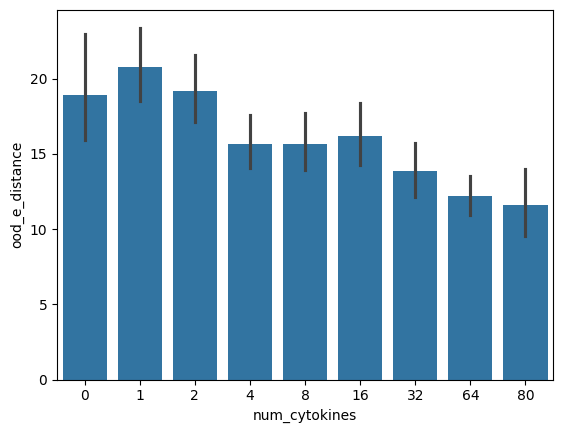

In [5]:
sns.barplot(df_res, x="num_cytokines", y="ood_e_distance")

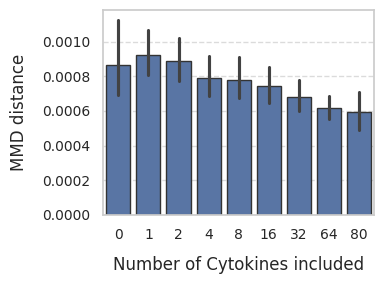

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style for cleaner plots
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(4, 3))  # Adjust the figure size
bar_plot = sns.barplot(
    data=df_res,
    x="num_cytokines",
    y="ood_mmd",
    edgecolor=".2"      # Add subtle edges to bars for clarity
)

# Customize plot appearance
bar_plot.set_xlabel("Number of Cytokines included", fontsize=12, labelpad=10)
bar_plot.set_ylabel("MMD distance", fontsize=12, labelpad=10)

# Rotate x-axis labels if needed
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for y-axis
bar_plot.yaxis.grid(True, linestyle='--', alpha=0.7)
bar_plot.xaxis.grid(False)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [207]:
df_g = pd.DataFrame(df_res.groupby(["cytokine", "donor"])["decoded_ood_r_squared"].mean())

In [208]:
df_g.sort_values("decoded_ood_r_squared")

decoded_ood_r_squared
cytokine   donor                         
IL-32-beta Donor4                0.835383
           Donor3                0.845340
           Donor2                0.894580
IL-1Ra     Donor4                0.903931
OX40L      Donor6                0.904025
...                                   ...
ADSF       Donor4                0.980561
FasL       Donor3                0.981056
           Donor4                0.981228
BAFF       Donor10               0.981864
FasL       Donor10               0.983463

[120 rows x 1 columns]

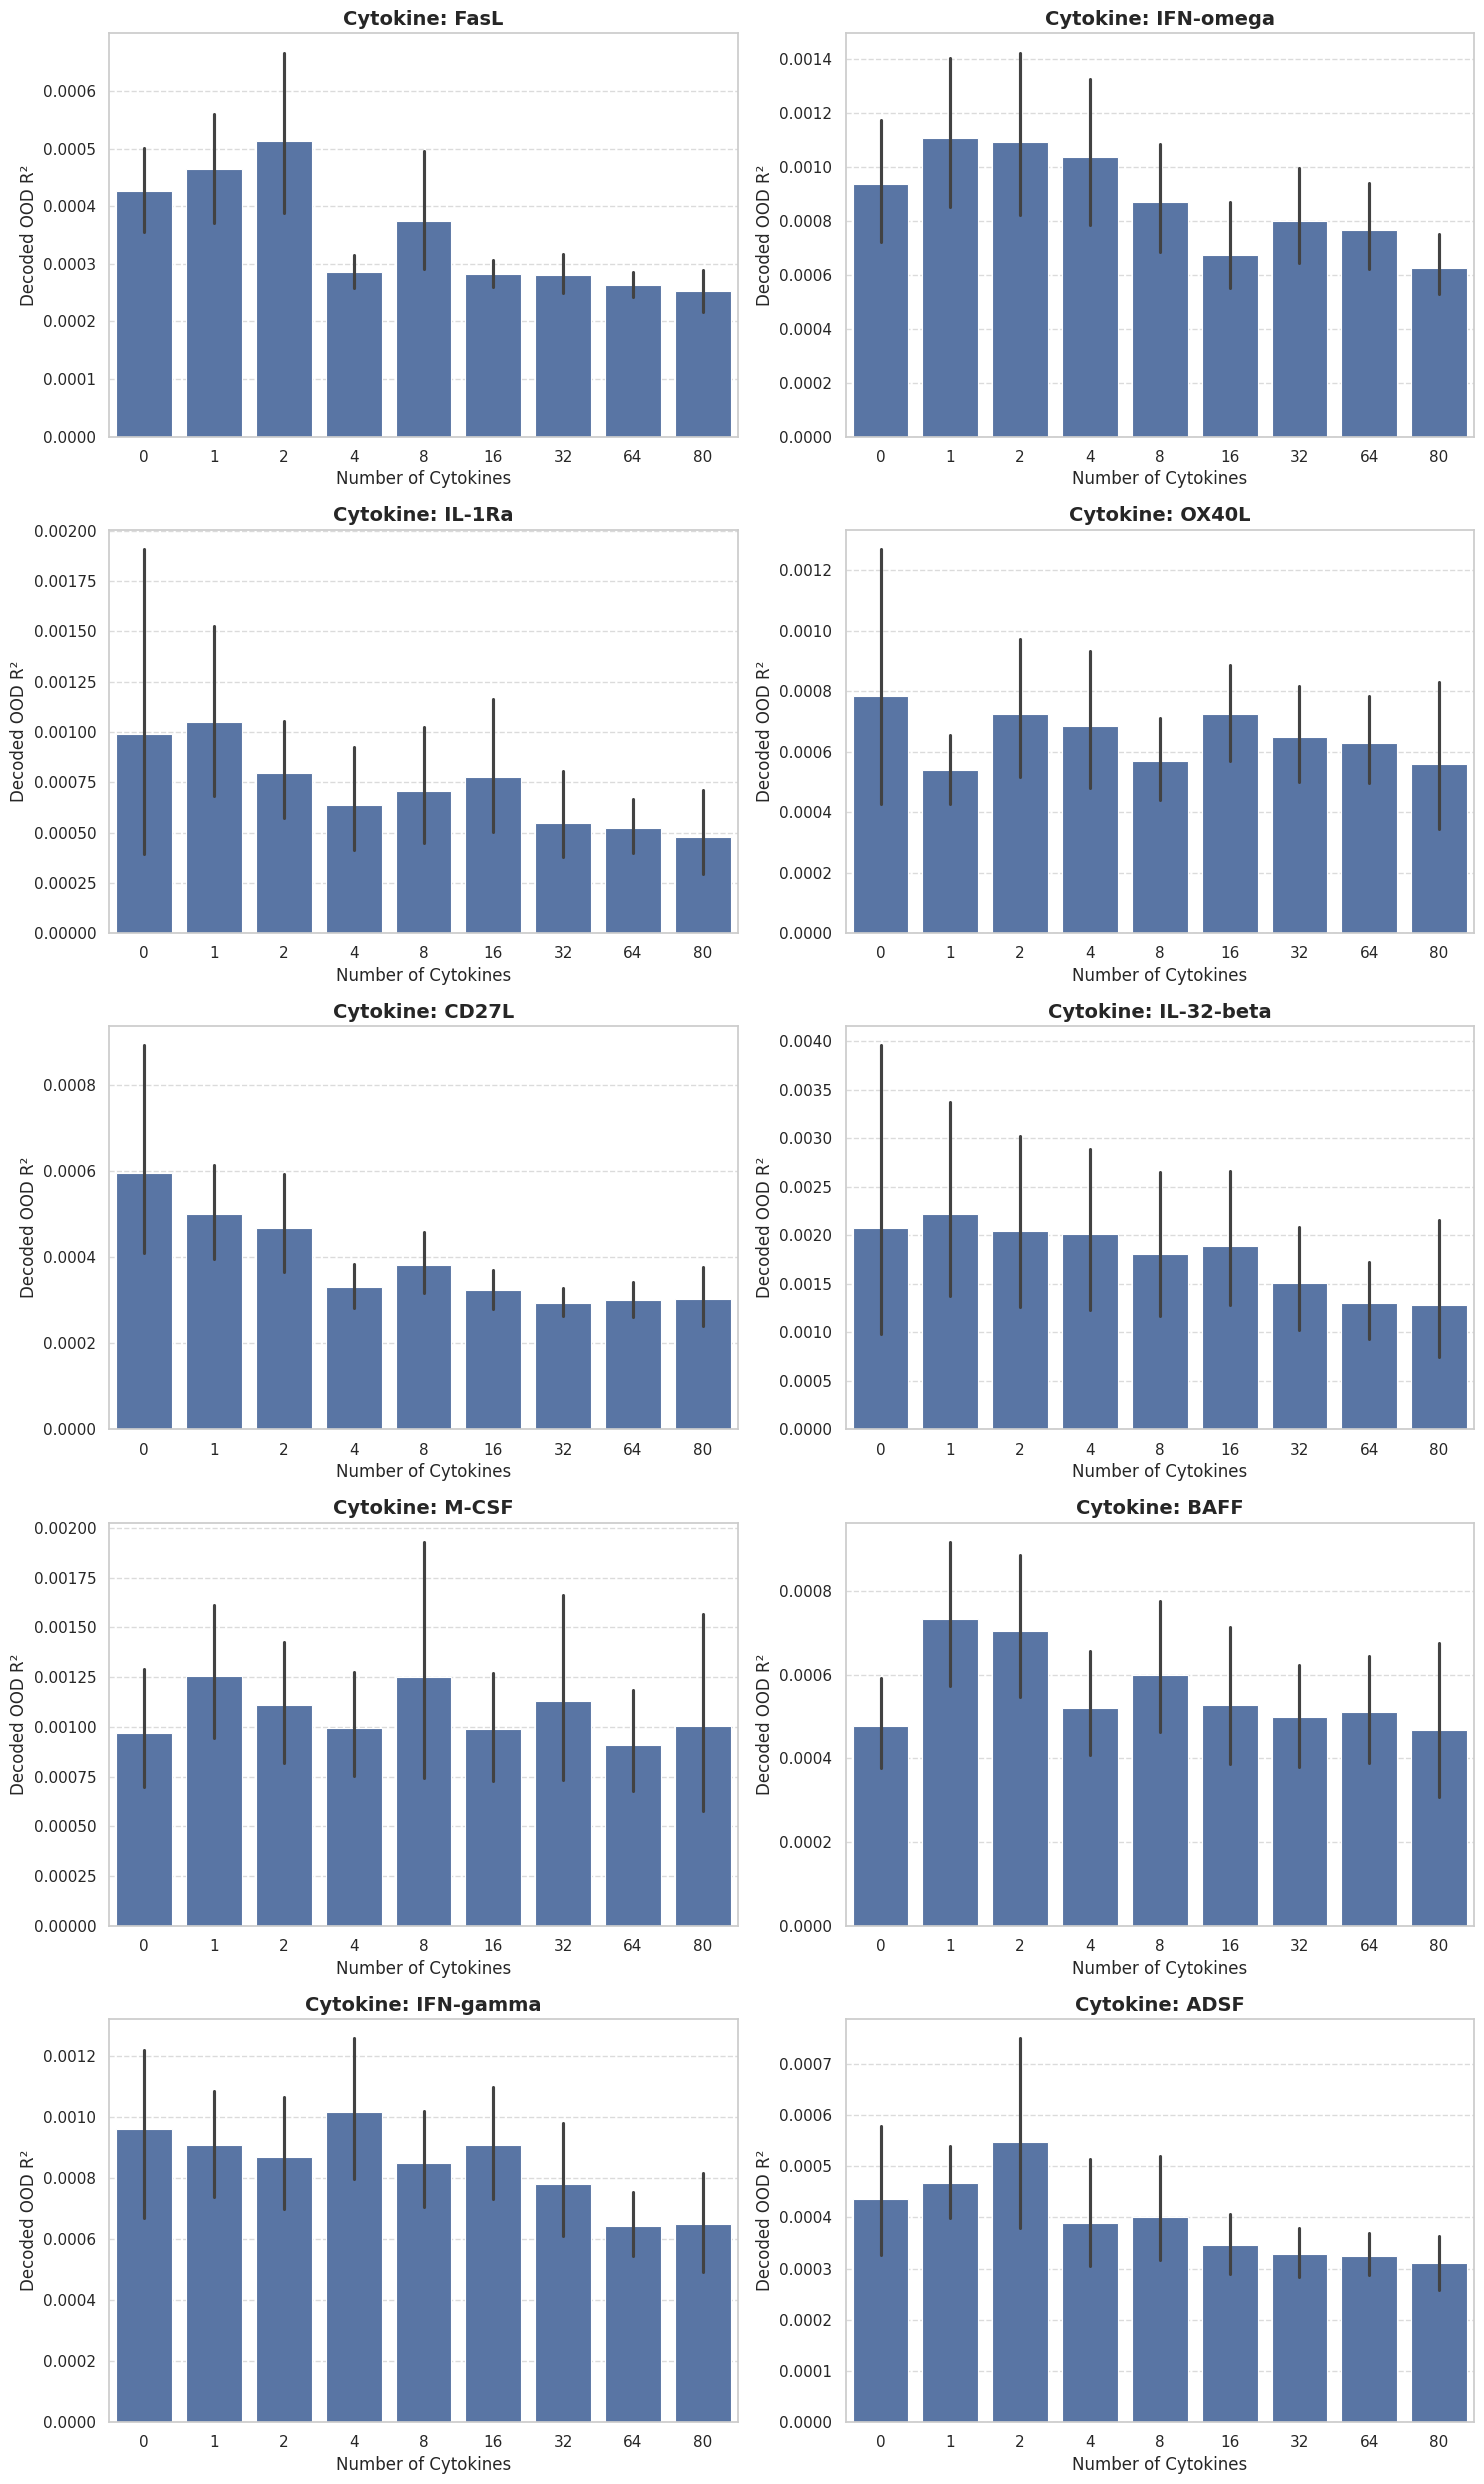

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_res is your DataFrame
unique_cytokines = df_res["cytokine"].unique()
num_cytokines = len(unique_cytokines)

# Set up the subplots with 2 columns
fig, axes = plt.subplots(nrows=(num_cytokines + 1) // 2, ncols=2, figsize=(15, num_cytokines * 2.5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Seaborn style
sns.set_theme(style="whitegrid")

for i, cyto in enumerate(unique_cytokines):
    ax = axes[i]
    df_tmp = df_res[df_res["cytokine"] == cyto]
    sns.barplot(
        data=df_tmp,
        x="num_cytokines",
        y="ood_mmd",
        ax=ax,
        linewidth=0.8,   # Subtle edge definition
    )
    ax.set_title(f'Cytokine: {cyto}', fontsize=14, weight='bold')
    ax.set_xlabel("Number of Cytokines", fontsize=12)
    ax.set_ylabel("Decoded OOD R²", fontsize=12)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# For all donors

In [78]:
df_res.head()

,cytokine,donor,ood_mmd,ood_e_distance,decoded_ood_r_squared,num_cytokines
0,OX40L,Donor5,0.000470,19.378363,0.949410,2
1,IL-32-beta,Donor3,0.002449,87.372482,0.850566,1
2,OX40L,Donor1,0.000654,18.460045,0.966312,16
3,IFN-omega,Donor4,0.002454,32.896013,0.938818,8
4,M-CSF,Donor4,0.002637,16.371132,0.956348,8


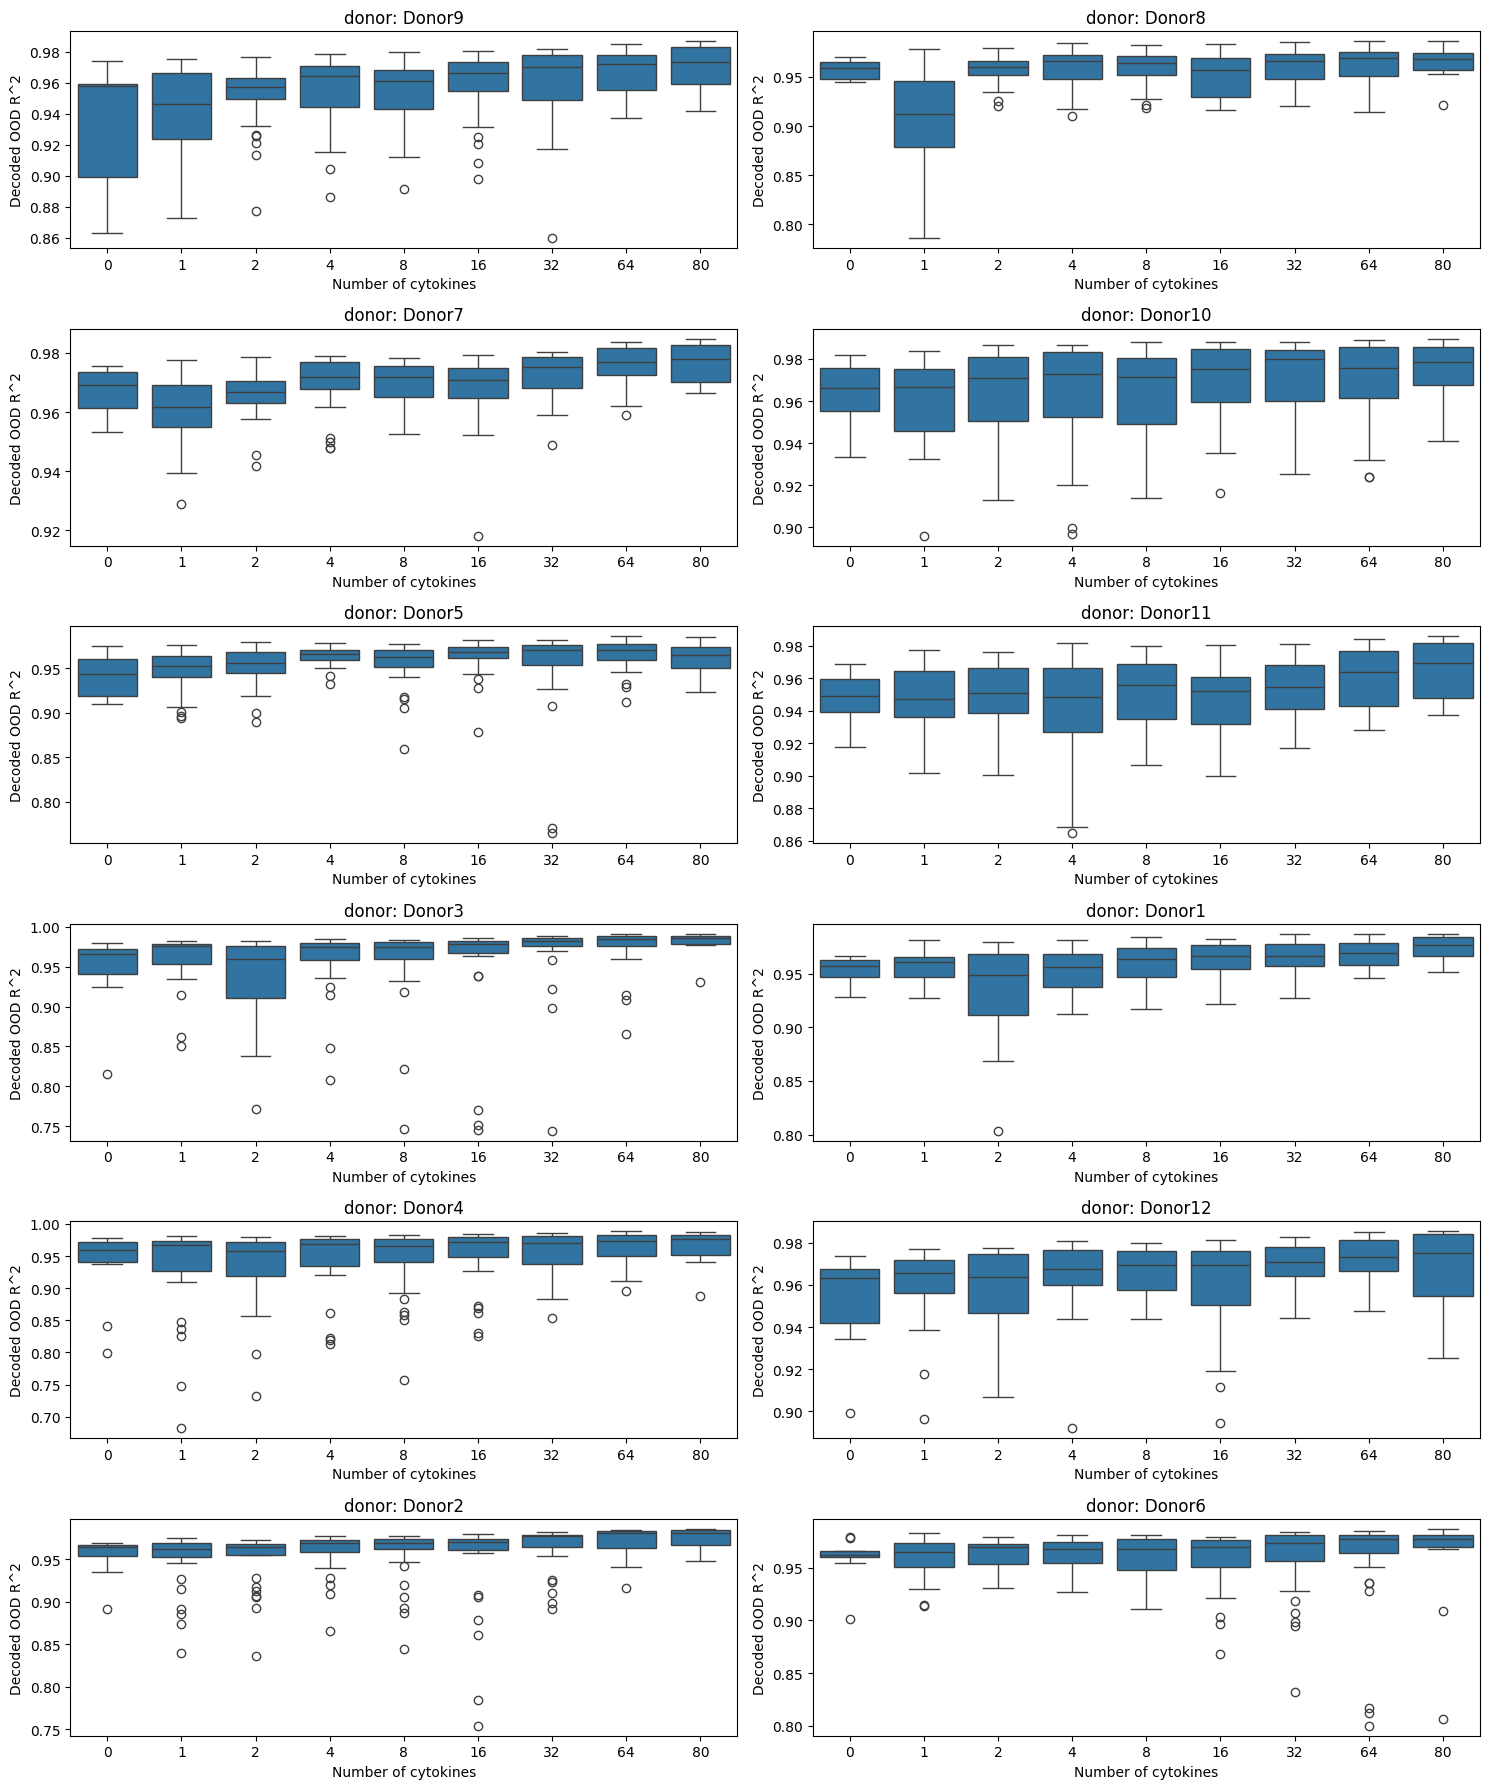

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_res is your DataFrame
unique_donors = df_res["donor"].unique()
num_cytokines = len(unique_donors)

# Set up the subplots with 2 columns
fig, axes = plt.subplots(nrows=(num_cytokines + 1) // 2, ncols=2, figsize=(15, num_cytokines * 3 // 2))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cyto in enumerate(unique_donors):
    ax = axes[i]
    df_tmp = df_res[df_res["donor"] == cyto]
    sns.boxplot(data=df_tmp, x="num_cytokines", y="decoded_ood_r_squared", ax=ax)
    ax.set_title(f'donor: {cyto}')
    ax.set_xlabel("Number of cytokines")
    ax.set_ylabel("Decoded OOD R^2")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Feature importance

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


def get_donor_importance(df_res: pd.DataFrame, donor: str, target_variable: str = "decoded_ood_r_squared", alpha: float = 0.1):
    # Get unique donors
    all_donors = df_res["donor"].unique()
    
    # Filter for the specific donor
    df_d = df_res[df_res["donor"] == donor]
    
    # Create binary columns for donors in training
    for d in all_donors:
        df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["donors_in_train"].astype(str), axis=1)
    
    # Create binary columns for number of donors
    for num_donor in df_res["num_donors"].unique():
        df_d[f"{num_donor}_present"] = df_d.apply(lambda x: x["num_donors"] == num_donor, axis=1)
    
    # Define feature columns
    cols = [f"{d}_present" for d in all_donors if d != donor] + \
           [f"{num_donor}_present" for num_donor in df_res["num_donors"].unique()]
    
    # Prepare feature matrix and target variable
    X = df_d[cols]
    y = df_d[target_variable]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit Lasso regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)
    
    # Extract coefficients
    coefficients = lasso.coef_
    intercept = lasso.intercept_
    
    # Create a DataFrame with feature importance
    feature_stats = pd.DataFrame({
        'Feature': cols,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    
    # Add the intercept for completeness
    feature_stats.loc[len(feature_stats)] = ['Intercept', intercept]
    
    return feature_stats


In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


def get_cytokine_importance(df_res: pd.DataFrame, cytokine: str, target_variable: str = "decoded_ood_r_squared", alpha: float = 0.1):
    all_cytokines_in_train = list(
        set(el for i in range(len(df_res)) for el in df_res.iloc[i]["cytokines_in_train"])
    )

    df_d = df_res[df_res["cytokine"]==cytokine]
    for d in all_cytokines_in_train:
        df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["cytokines_in_train"], axis=1)

    for num_cytokines in df_res["num_cytokines"].unique():
        df_d[f"{num_cytokines}_present"] = df_d.apply(lambda x: x["num_cytokines"] == num_cytokines, axis=1)
    
    cols = [f"{d}_present" for d in all_cytokines_in_train] + [f"{num_cytokines}_present" for num_cytokines in df_d["num_cytokines"].unique()]
    # Prepare feature matrix and target variable
    X = df_d[cols]
    y = df_d[target_variable]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit Lasso regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)
    
    # Extract coefficients
    coefficients = lasso.coef_
    intercept = lasso.intercept_
    
    # Create a DataFrame with feature importance
    feature_stats = pd.DataFrame({
        'Feature': cols,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    
    # Add the intercept for completeness
    feature_stats.loc[len(feature_stats)] = ['Intercept', intercept]
    
    return feature_stats



In [13]:
all_cytokines_in_test = df_res["cytokine"].unique()

all_cytokines_in_train = list(
        set(el for i in range(len(df_res)) for el in df_res.iloc[i]["cytokines_in_train"])
    )

cytokine_cols = [f"{d}_present" for d in all_cytokines_in_train] + [f"{num_cytokines}_present" for num_cytokines in df_res["num_cytokines"].unique()]
df_c = pd.DataFrame(columns=cytokine_cols)
for cytokine in all_cytokines_in_test:
    d = get_cytokine_importance(df_res, cytokine, alpha=0.00005).set_index("Feature")
    d.loc[f"{cytokine}_present"] = None
    df_c.loc[cytokine] = d.loc[cytokine_cols]["Coefficient"]
    

/tmp/ipykernel_825084/1454952716.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["cytokines_in_train"], axis=1)
/tmp/ipykernel_825084/1454952716.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["cytokines_in_train"], axis=1)
/tmp/ipykernel_825084/1454952716.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

<Axes: >

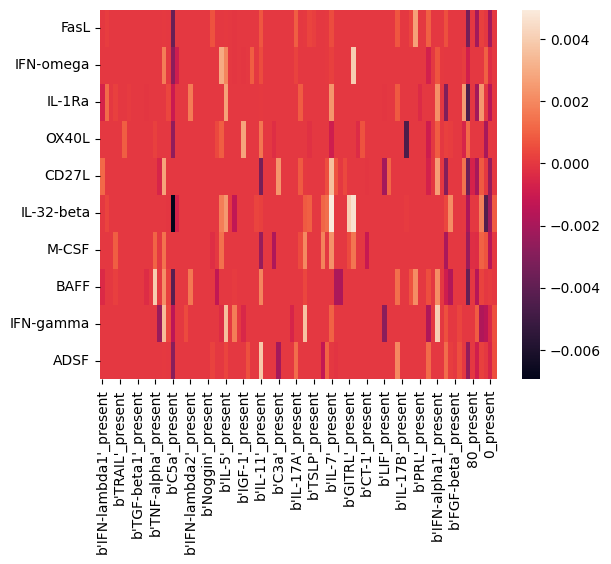

In [14]:
sns.heatmap(df_c)

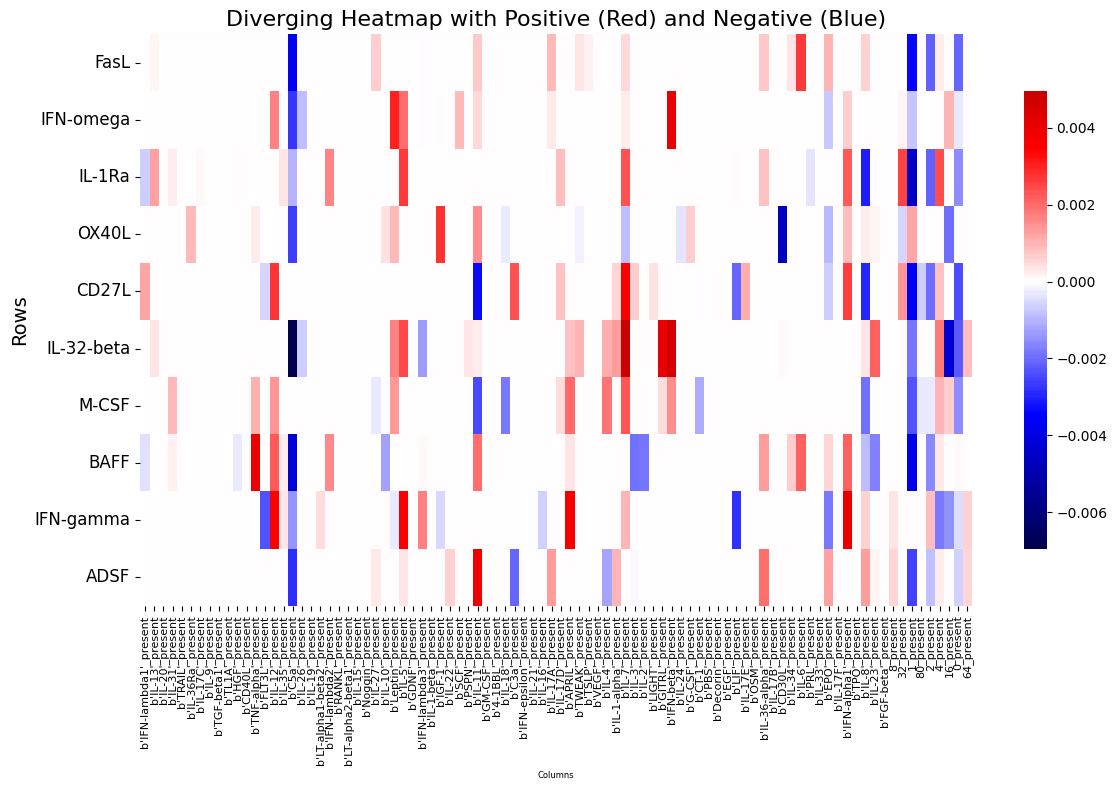

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_c,
    cmap="seismic",            # Diverging colormap: blue (negative), gray (neutral), red (positive)
    center=0,                  # Set 0 as the midpoint of the colormap
    linecolor='white',         # Use white borders between cells
    cbar_kws={'shrink': 0.8}   # Shrink the colorbar
)

# Ensure every xtick label is plotted
plt.xticks(ticks=np.arange(len(df_c.columns)) + 0.5,  # Center ticks on heatmap cells
           labels=df_c.columns,                      # Use column names as labels
           rotation=90,                              # Rotate for better visibility
           fontsize=8)                              # Adjust font size for readability
plt.yticks(ticks=np.arange(len(df_c)) + 0.5,         # Center y-ticks on heatmap cells
           labels=df_c.index,                       # Use row indices as labels
           fontsize=12,                             # Adjust font size for readability
           rotation=0)                              # Keep y-axis labels horizontal
plt.title("Diverging Heatmap with Positive (Red) and Negative (Blue)", fontsize=16)
plt.xlabel("Columns", fontsize=6)
plt.ylabel("Rows", fontsize=14)
plt.tight_layout()
plt.show()


In [251]:
df_pvals.min().min()

0.02654281015329499

In [259]:
df_pvals

,b'IL-17C'_present,b'IL-17F'_present,b'PRL'_present,b'IL-24'_present,b'EGF'_present,b'IL-20'_present,b'LIGHT'_present,b'C3a'_present,b'Decorin'_present,b'IL-31'_present,...,b'TSLP'_present,b'OSM'_present,b'IFN-beta'_present,b'Noggin'_present,b'IL-9'_present,b'IL-17B'_present,b'FLT3L'_present,b'C5a'_present,b'IL-26'_present,b'CD40L'_present
b'IL-17C',NaN,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,...,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195
b'IL-17F',0.320665,NaN,0.319065,0.290644,0.385076,0.384040,0.996376,0.395168,0.276929,0.299499,...,0.463328,0.366364,0.273827,0.339307,0.273726,0.289351,0.463625,0.279254,0.409983,0.338008
b'PRL',0.241243,0.435748,NaN,0.215916,0.283755,0.315000,0.818612,0.307062,0.201463,0.213915,...,0.520202,0.884290,0.204267,0.276906,0.201172,0.206373,0.342993,0.218790,0.210192,0.340089
b'IL-24',0.300825,0.410746,0.296028,NaN,0.434970,0.374568,0.278576,0.422491,0.253657,0.270570,...,0.408661,0.492844,0.262974,0.335060,0.255883,0.286246,0.685907,0.258538,0.406511,0.431347
b'EGF',0.322583,0.532413,0.250039,0.283619,NaN,0.431508,0.249123,0.423904,0.249819,0.294739,...,0.520853,0.327484,0.328124,0.357635,0.250966,0.305662,0.489437,0.257903,0.357853,0.340234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'IL-17B',0.335748,0.502166,0.271263,0.288298,0.359406,0.426079,0.353809,0.405760,0.273268,0.283366,...,0.571304,0.647194,0.394649,0.368457,0.281830,NaN,0.501213,0.282207,0.292731,0.330574
b'FLT3L',0.338854,0.524465,0.280394,0.291139,0.370275,0.415260,0.394979,0.414382,0.285082,0.290244,...,0.559595,0.531741,0.396701,0.388094,0.291859,0.283617,NaN,0.289436,0.287339,0.350230
b'C5a',0.273619,0.314672,0.256279,0.254344,0.350929,0.381346,0.281127,0.315103,0.268200,0.255246,...,0.488768,0.328241,0.429458,0.267833,0.267952,0.269100,0.301705,NaN,0.257155,0.331996
b'IL-26',0.334529,0.488701,0.313498,0.289398,0.369686,0.400486,0.312109,0.401505,0.298705,0.286630,...,0.596601,0.605381,0.382843,0.366862,0.295849,0.286238,0.498608,0.295712,NaN,0.355275


In [242]:
cytokine_cols

['OX40L_present',
 'IL-32-beta_present',
 'IFN-omega_present',
 'M-CSF_present',
 'BAFF_present',
 'FasL_present',
 'CD27L_present',
 'IFN-gamma_present',
 'ADSF_present',
 'IL-1Ra_present']

In [16]:
2909.87+538.69

3448.56

In [186]:
(df_pvals<0.05/11).sum() # signficance without Bonferroni correction

OX40L_present         0
IL-32-beta_present    0
IFN-omega_present     0
M-CSF_present         0
BAFF_present          0
FasL_present          0
CD27L_present         0
IFN-gamma_present     0
ADSF_present          0
IL-1Ra_present        0
dtype: int64

In [255]:
(df_pvals<0.05).sum().sum() # signficance without Bonferroni correction

2

In [258]:
df_pvals.idxmin().idxmin()

"b'TRAIL'_present"